In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# Constantes

In [2]:
# Rutas de S3
S3_REFINED_URI = 's3://proyecto-integrador-20212-pregrado/datasets/refined/'

# Clusterización supervisada de las acciones con KNN
En este caso se usará cada día como una variable y cada acción como un registro porque se quieren clasificar las acciones en diferentes clusters.

In [3]:
# Cargar la matriz de retornos etiquetada de S3
df_returns_with_tags = pd.read_parquet(f'{S3_REFINED_URI}matriz_retornos_etiquetada.parquet')
df_returns_with_tags.head()

,2014-01-03,2014-01-04,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-13,2014-01-14,...,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,label
A,1.850863,-0.524201,-0.342526,1.172116,1.533101,0.360329,0.265003,0.468923,0.101833,1.492031,...,0.726392,-0.027213,-0.308502,-3.467735,2.489157,2.023919,1.190261,2.299055,-0.374564,5
AA,0.285036,0.142113,0.000000,-0.047304,2.082347,-1.437181,-4.797742,-0.098814,0.000000,1.434224,...,6.080000,6.485671,3.541076,0.355677,3.217012,-0.475436,5.175159,5.122382,-2.448392,3
AAN,0.748045,-0.269997,-0.135364,-1.660454,1.550655,-1.594842,-0.103448,0.000000,-6.800138,-1.370370,...,2.632479,1.798801,-0.343586,0.738795,2.183833,0.526316,2.808187,2.407407,-2.998794,0
AAP,3.485500,-0.212164,-0.921332,0.947783,-0.017715,0.717576,1.534876,0.177589,-1.100398,2.607821,...,0.656691,-1.976695,-1.105960,-0.810286,-1.302998,-1.224434,0.831025,2.918956,-0.013347,5
AAPL,-1.429295,-0.704820,0.862324,-0.970411,0.584806,-1.236408,-0.771251,0.054445,0.632341,1.515914,...,0.000000,0.951942,-0.810036,-1.164252,0.542373,0.000000,0.000000,-2.916386,1.007119,5


In [5]:
# Definir X y Y
X = df_returns_with_tags.drop('label', axis = 1)
y = df_returns_with_tags['label']

Separar los datos en datos de entrenamiento y de validación, con una separación de 80% para entrenamiento y 20% para validación

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [20]:
# Función calcular la precisión en entrenamiento y validación para un modelo dado
def calculate_accuracy(model, X_train, X_test, y_train, y_test):
    return model.score(X_train, y_train), model.score(X_test, y_test)

In [45]:
# Hallar la precisión del modelo KNN para varios valores de k
num_ks = 30
ks = np.arange(1, num_ks+1)
train_accuracies = np.zeros(num_ks)
test_accuracies = np.zeros(num_ks)

for i, k in enumerate(ks):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_accuracies[i], test_accuracies[i] = calculate_accuracy(knn, X_train, X_test, y_train, y_test)

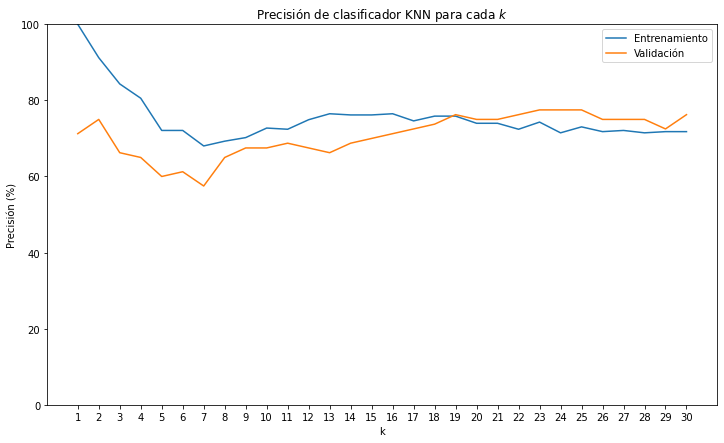

In [46]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Precisión de clasificador KNN para cada $k$')
ax.set_xlabel('k')
ax.set_xticks(np.linspace(1,num_ks, num_ks))
ax.set_ylabel('Precisión (%)')
ax.set_ylim(0,100)
ax.plot(ks, train_accuracies*100, label='Entrenamiento')
ax.plot(ks, test_accuracies*100, label='Validación')
ax.legend();